In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikolaykomarov/cian-house-pricing")

print("Path to dataset files:", path)

100%|███████████████████████████████████████| 29.7k/29.7k [00:00<00:00, 331kB/s]

Extracting files...
Path to dataset files: /home/anastasiia/.cache/kagglehub/datasets/nikolaykomarov/cian-house-pricing/versions/1


In [4]:
import zipfile
import os
with zipfile.ZipFile('cian house pricing.zip', 'r') as zip_ref:
    zip_ref.extractall('cian_house_pricing')

print("Архив успешно распакован")

Архив успешно распакован


In [19]:
import pandas as pd

file_path = "cian_house_pricing/merged.csv"
df = pd.read_csv(file_path)
df.head()

,Underground Times,"Flat Status (1 - handed over, 0 - not handed over)",Flat Type,Total Area (m^2),Living Area (m^2),Kitchen Area (m^2),Floor,Year of building,Price (Rubles)
0,"{'Underground name': ['Балтийская', 'Василеост...",1,4-комн,125.50,75.8,22.9,4,1876,24500000
1,"{'Underground name': ['Московская', 'Бухарестс...",1,2-комн,41.50,26.4,6.0,3,1964,6300000
2,"{'Underground name': ['Василеостровская', 'Спо...",0,3-комн,80.39,44.9,10.2,3,2025,30061520
3,"{'Underground name': ['Улица Дыбенко', 'Проспе...",1,2-комн,65.10,27.0,19.0,4,1983,11500000
4,"{'Underground name': ['Девяткино', 'Граждански...",1,1-комн,38.50,16.6,10.5,10,2015,5599000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 9 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Underground Times                                   1080 non-null   object 
 1   Flat Status (1 - handed over, 0 - not handed over)  1080 non-null   int64  
 2   Flat Type                                           1080 non-null   object 
 3   Total Area (m^2)                                    1080 non-null   float64
 4   Living Area (m^2)                                   1080 non-null   float64
 5   Kitchen Area (m^2)                                  1080 non-null   float64
 6   Floor                                               1080 non-null   int64  
 7   Year of building                                    1080 non-null   int64  
 8   Price (Rubles)                                      1080 non-null   int64  
dty

In [21]:
print("Размер датасета:", df.shape)
print("\nОписательная статистика:")
df.describe()

Размер датасета: (1080, 9)

Описательная статистика:


,"Flat Status (1 - handed over, 0 - not handed over)",Total Area (m^2),Living Area (m^2),Kitchen Area (m^2),Floor,Year of building,Price (Rubles)
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1.080000e+03
mean,0.706481,73.969769,37.214444,15.849907,5.714815,1998.094444,3.175186e+07
std,0.455585,65.020208,35.316190,14.305356,4.548795,44.996266,8.373448e+07
min,0.000000,18.200000,6.300000,1.000000,1.000000,1720.000000,1.680000e+06
25%,0.000000,33.460000,14.300000,7.175000,2.000000,1994.000000,6.010252e+06
50%,1.000000,50.700000,26.800000,12.300000,4.000000,2018.500000,1.158008e+07
75%,1.000000,87.322500,46.125000,18.700000,8.000000,2024.000000,2.796000e+07
max,1.000000,533.200000,286.100000,205.100000,25.000000,2029.000000,2.200000e+09


/tmp/ipykernel_5502/4228616310.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


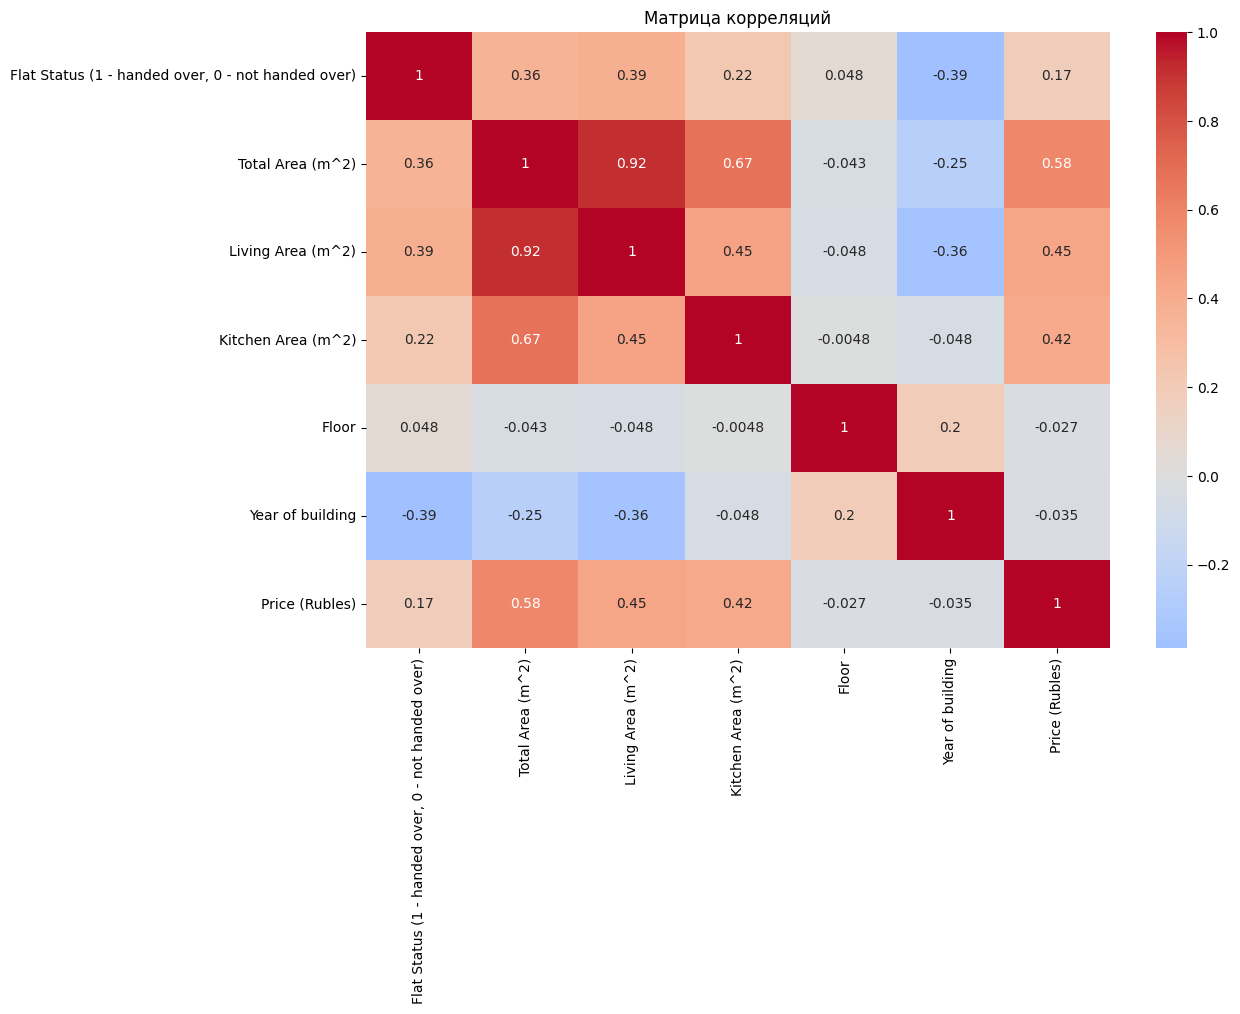

Корреляция признаков с ценой:
Price (Rubles)                                        1.000000
Total Area (m^2)                                      0.580025
Living Area (m^2)                                     0.445096
Kitchen Area (m^2)                                    0.416138
Flat Status (1 - handed over, 0 - not handed over)    0.172294
Floor                                                -0.027365
Year of building                                     -0.034665
Name: Price (Rubles), dtype: float64


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Матрица корреляций
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

price_correlations = correlation_matrix['Price (Rubles)'].sort_values(ascending=False)
print("Корреляция признаков с ценой:")
print(price_correlations)

In [23]:
df['Flat Type'].unique()

array(['4-комн', '2-комн', '3-комн', '1-комн', '5-комн', 'Студия',
       'Многокомнатны', 'Многокомнатна', 'Апартаменты-студия', '15/4',
       'Квартир', '29/4'], dtype=object)

In [24]:
with pd.option_context('display.max_columns', None):
    display(df[df['Flat Type'] == 'Квартир'])

,Underground Times,"Flat Status (1 - handed over, 0 - not handed over)",Flat Type,Total Area (m^2),Living Area (m^2),Kitchen Area (m^2),Floor,Year of building,Price (Rubles)
404,"{'Underground name': ['Гостиный двор', 'Невски...",1,Квартир,248.7,216.8,20.0,6,1852,97000000
943,"{'Underground name': ['Гостиный двор', 'Невски...",1,Квартир,248.7,216.8,20.0,6,1852,97000000
973,"{'Underground name': ['Ленинский проспект', 'П...",1,Квартир,55.9,39.7,5.2,3,1964,5610000


In [25]:
print(f"Исходное количество строк: {len(df)}")
print(f"Количество дубликатов: {df.duplicated().sum()}")

Исходное количество строк: 1080
Количество дубликатов: 81


In [26]:
df_clean = df.drop_duplicates().copy()
print(f"Количество строк после очистки: {len(df_clean)}")

Количество строк после очистки: 999


In [27]:
df_clean['Flat Type'].value_counts()

1-комн                284
2-комн                217
3-комн                216
Студия                150
4-комн                 77
5-комн                 22
Многокомнатна          17
Апартаменты-студия     11
Квартир                 2
Многокомнатны           1
15/4                    1
29/4                    1
Name: Flat Type, dtype: int64

In [28]:
def clean_flat_type(flat_type):
    if pd.isna(flat_type):
        return 'Не указано'
    
    flat_type = str(flat_type).strip().lower()

    # Стандартные категории
    if flat_type in ['1-комн', '1 комн', '1к']:
        return '1-комн'
    elif flat_type in ['2-комн', '2 комн', '2к']:
        return '2-комн'
    elif flat_type in ['3-комн', '3 комн', '3к']:
        return '3-комн'
    elif flat_type in ['4-комн', '4 комн', '4к']:
        return '4-комн'
    elif flat_type in ['5-комн', '5 комн', '5к']:
        return '5-комн'
    elif flat_type == 'студия':
        return 'Студия'
    elif flat_type == 'апартаменты-студия':
        return 'Апартаменты-студия'
    elif any(x in flat_type for x in ['многокомнатна', 'многокомнатны', 'многокомнатная']):
        return 'Многокомнатная'
    
    # Обработка нестандартных значений
    elif '/' in flat_type:
        parts = flat_type.split('/')
        if len(parts) == 2 and parts[1].isdigit():
            room_count = int(parts[1])
            if 1 <= room_count <= 5:
                return f"{room_count}-комн"
    
    elif flat_type == 'квартир':
        return 'Другое'

    return 'Другое'

df_clean['Flat Type'] = df_clean['Flat Type'].apply(clean_flat_type)

print(df_clean['Flat Type'].value_counts())

1-комн                284
2-комн                217
3-комн                216
Студия                150
4-комн                 79
5-комн                 22
Многокомнатная         18
Апартаменты-студия     11
Другое                  2
Name: Flat Type, dtype: int64


In [29]:
df_clean.head()

,Underground Times,"Flat Status (1 - handed over, 0 - not handed over)",Flat Type,Total Area (m^2),Living Area (m^2),Kitchen Area (m^2),Floor,Year of building,Price (Rubles)
0,"{'Underground name': ['Балтийская', 'Василеост...",1,4-комн,125.50,75.8,22.9,4,1876,24500000
1,"{'Underground name': ['Московская', 'Бухарестс...",1,2-комн,41.50,26.4,6.0,3,1964,6300000
2,"{'Underground name': ['Василеостровская', 'Спо...",0,3-комн,80.39,44.9,10.2,3,2025,30061520
3,"{'Underground name': ['Улица Дыбенко', 'Проспе...",1,2-комн,65.10,27.0,19.0,4,1983,11500000
4,"{'Underground name': ['Девяткино', 'Граждански...",1,1-комн,38.50,16.6,10.5,10,2015,5599000


In [30]:
print(f"Количество дубликатов: {df_clean.duplicated().sum()}")

Количество дубликатов: 0


In [33]:
import numpy as np

# Проверка корректности числовых столбцов
def check_numeric_columns(df):
    
    # Проверка корректности площадей
    invalid_area = df[
        (df['Living Area (m^2)'] > df['Total Area (m^2)']) | 
        (df['Kitchen Area (m^2)'] > df['Total Area (m^2)']) |
        (df['Living Area (m^2)'] + df['Kitchen Area (m^2)'] > df['Total Area (m^2)'])
    ]
    
    if len(invalid_area) > 0:
        print(f"Найдено {len(invalid_area)} строк с некорректными соотношениями площадей")
        display(invalid_area[area_columns])
    
    # Проверка этажа
    invalid_floor = df[df['Floor'] < 0]
    if len(invalid_floor) > 0:
        print(f"Найдено {len(invalid_floor)} строк с некорректным этажом (< 0)")
        display(invalid_floor[['Floor']])
    
    # Проверка года постройки
    invalid_year = df[
        (df['Year of building'] < 1704)
    ]
    if len(invalid_year) > 0:
        print(f"Найдено {len(invalid_year)} строк с некорректным годом постройки")
        display(invalid_year[['Year of building']])
    
    # Проверка цены
    invalid_price = df[df['Price (Rubles)'] <= 0]
    if len(invalid_price) > 0:
        print(f"Найдено {len(invalid_price)} строк с некорректной ценой (<= 0)")
        display(invalid_price[['Price (Rubles)']])

check_numeric_columns(df_clean)

In [34]:
status_stats = df_clean['Flat Status (1 - handed over, 0 - not handed over)'].value_counts()

print("Статистика статуса квартир:")
print(status_stats)

Статистика статуса квартир:
1    696
0    303
Name: Flat Status (1 - handed over, 0 - not handed over), dtype: int64


/tmp/ipykernel_5502/3402906817.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_clean.corr()


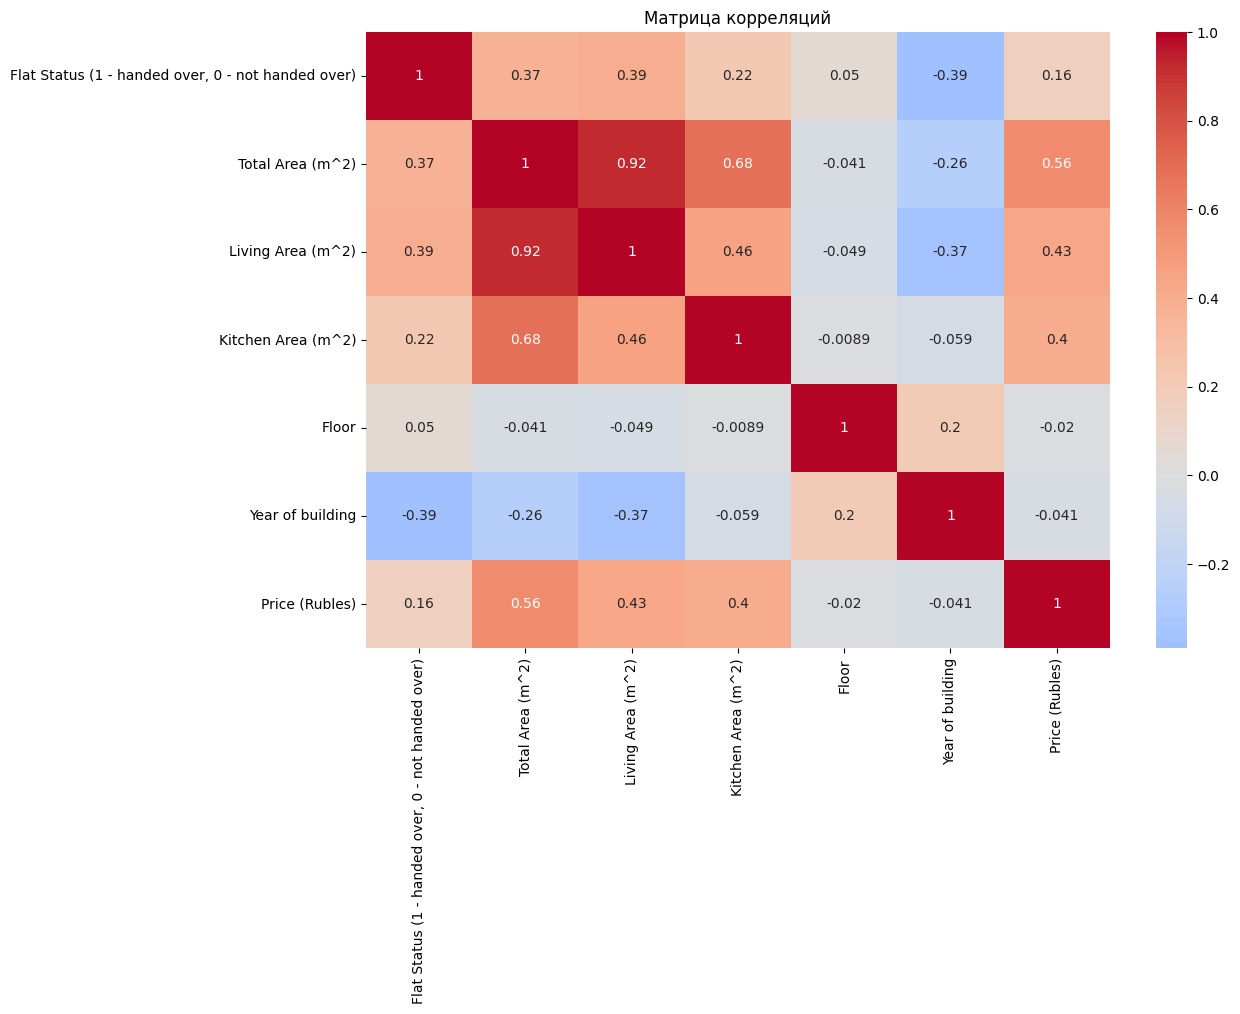

Корреляция признаков с ценой:
Price (Rubles)                                        1.000000
Total Area (m^2)                                      0.560531
Living Area (m^2)                                     0.429976
Kitchen Area (m^2)                                    0.397615
Flat Status (1 - handed over, 0 - not handed over)    0.163406
Floor                                                -0.020299
Year of building                                     -0.041446
Name: Price (Rubles), dtype: float64


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df_clean.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

price_correlations = correlation_matrix['Price (Rubles)'].sort_values(ascending=False)
print("Корреляция признаков с ценой:")
print(price_correlations)

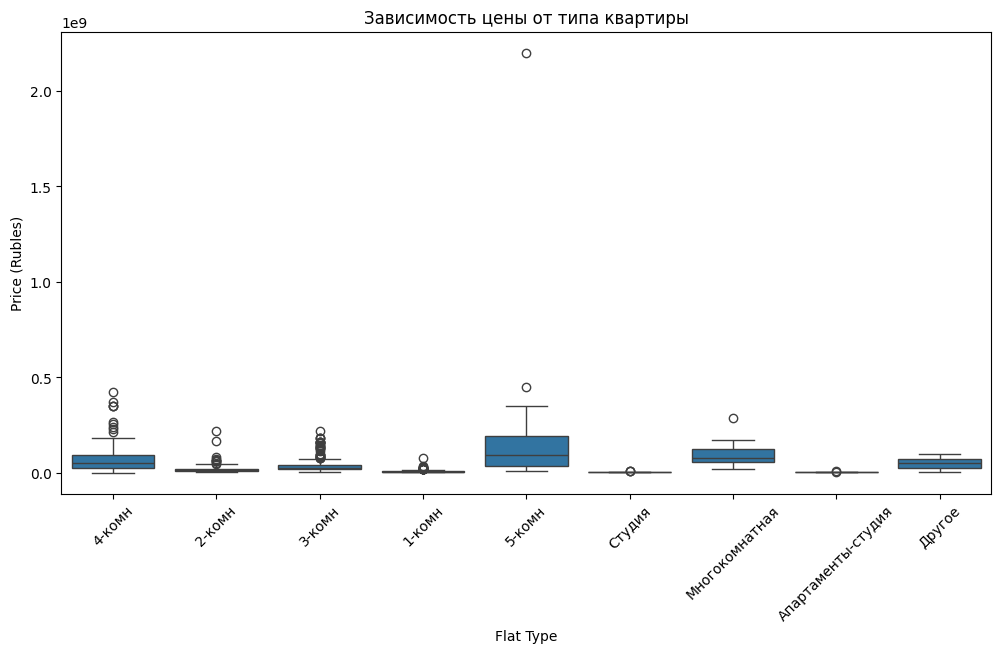

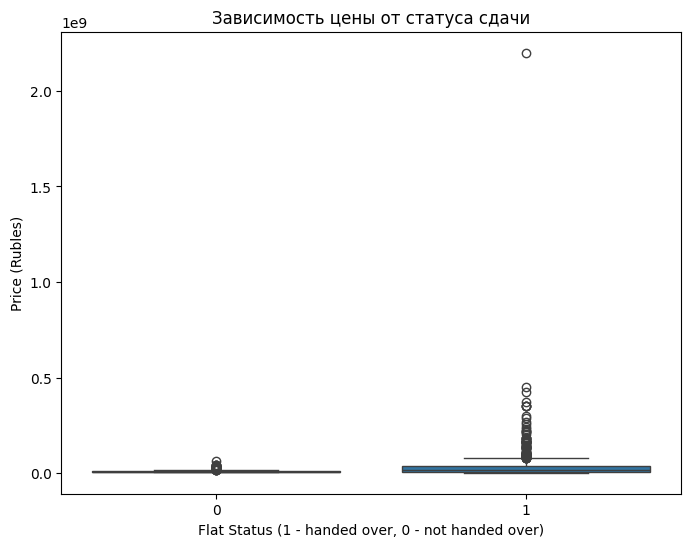

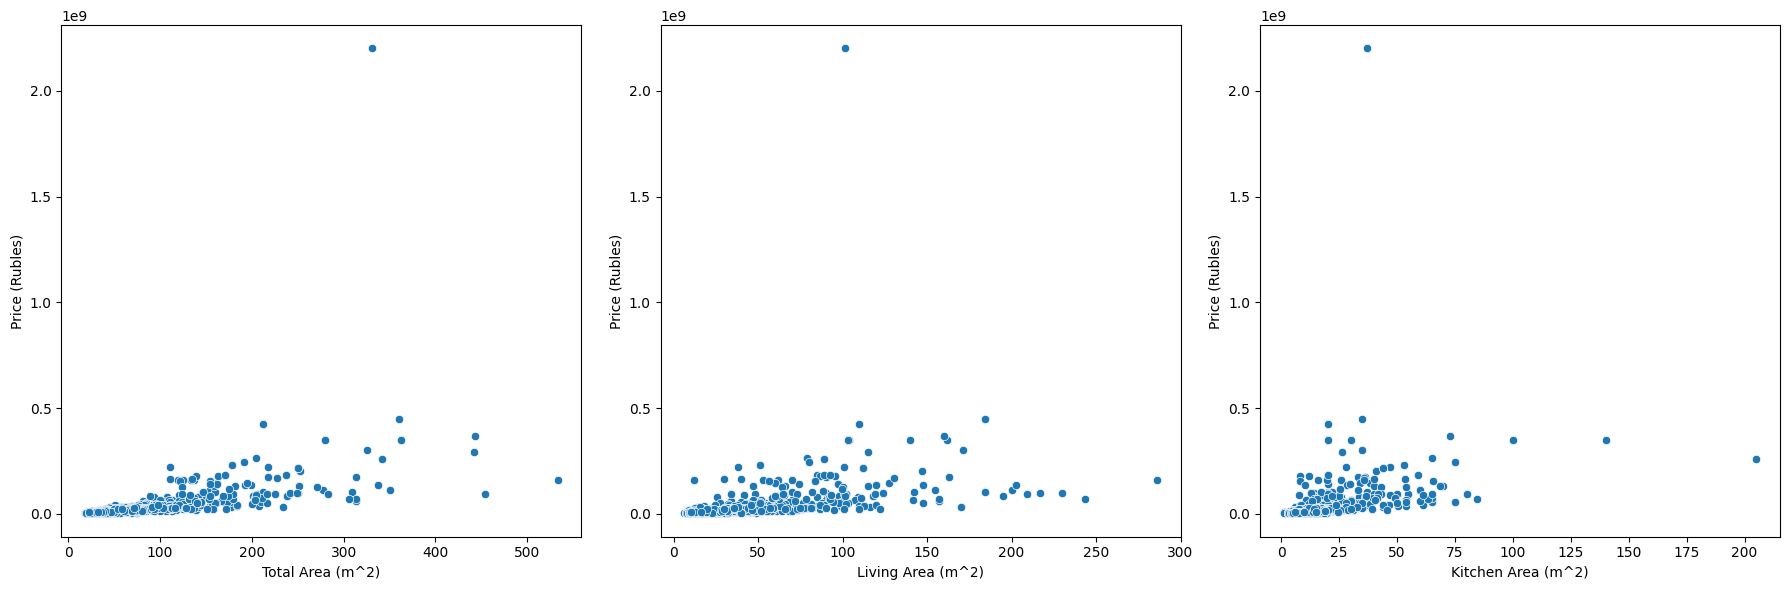

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Flat Type', y='Price (Rubles)', data=df_clean)
plt.title('Зависимость цены от типа квартиры')
plt.xticks(rotation=45)
plt.show()

# Зависимость от статуса сдачи
plt.figure(figsize=(8, 6))
sns.boxplot(x='Flat Status (1 - handed over, 0 - not handed over)', y='Price (Rubles)', data=df_clean)
plt.title('Зависимость цены от статуса сдачи')
plt.show()

# Зависимость от площади
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.scatterplot(x='Total Area (m^2)', y='Price (Rubles)', data=df_clean, ax=axes[0])
sns.scatterplot(x='Living Area (m^2)', y='Price (Rubles)', data=df_clean, ax=axes[1])
sns.scatterplot(x='Kitchen Area (m^2)', y='Price (Rubles)', data=df_clean, ax=axes[2])
plt.tight_layout()
plt.show()

In [37]:
original_count = len(df_clean)

df_clean = df_clean[~((df_clean['Flat Type'] == '5-комн') & (df_clean['Price (Rubles)'] > 1000000000))]

removed_count = original_count - len(df_clean)
print(f"Удалено записей: {removed_count}")
print(f"Осталось записей: {len(df_clean)}")

Удалено записей: 1
Осталось записей: 998


In [40]:
#избавились от единичноо выброса

In [43]:
import ast
from collections import Counter
def parse_underground_data(data):
    if isinstance(data, (dict, list)):
        return data
    elif isinstance(data, str):
        return ast.literal_eval(data)
    else:
        return None

df_clean['Underground Times Parsed'] = df_clean['Underground Times'].apply(parse_underground_data)
print("Пример преобразованных данных:")
print(df_clean['Underground Times Parsed'].iloc[0])

Пример преобразованных данных:
{'Underground name': ['Балтийская', 'Василеостровская', 'Нарвская'], 'Underground time': ['5', '5', '5'], 'Transport type': ['car', 'car', 'car']}


In [44]:
import pandas as pd
from ast import literal_eval
df_clean['parsed'] = df_clean['Underground Times'].apply(literal_eval)

unique_stations = set()
for entry in df_clean['parsed']:
    unique_stations.update(entry['Underground name'])

unique_transport = set()
for entry in df_clean['parsed']:
    unique_transport.update(entry['Transport type'])

print("Уникальные станции:", unique_stations)
print("Уникальный транспорт:", unique_transport)

Уникальные станции: {'Удельная', 'Невский проспект', 'Беговая', 'Пионерская', 'Автово', 'Фрунзенская', 'Международная', 'Пролетарская', 'Технологический институт', 'Академическая', 'Горный институт', 'Проспект Большевиков', 'Крестовский остров', 'Звездная', 'Гражданский проспект', 'Комендантский проспект', 'Гостиный двор', 'Площадь Ленина', 'Владимирская', 'Ленинский проспект', 'Маяковская', 'Электросила', 'Проспект Просвещения', 'Московская', 'Петроградская', 'Лиговский проспект', 'Нарвская', 'Горьковская', 'Приморская', 'Ладожская', 'Лесная', 'Ломоносовская', 'Новочеркасская', 'Площадь Александра Невского', 'Звенигородская', 'Черная речка', 'Елизаровская', 'Спортивная', 'Шушары', 'Достоевская', 'Чернышевская', 'Балтийская', 'Дунайская', 'Обухово', 'Купчино', 'Площадь Мужества', 'Адмиралтейская', 'Старая Деревня', 'Волковская', 'Садовая', 'Василеостровская', 'Озерки', 'Политехническая', 'Обводный канал', 'Рыбацкое', 'Парнас', 'Бухарестская', 'Кировский завод', 'Проспект Ветеранов', 'С

In [45]:
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df_clean['Underground_dict'] = df_clean['Underground Times'].apply(ast.literal_eval)

# Извлечение минимального времени до метро
def get_min_metro_time(metro_dict):
    try:
        times = [int(time) for time in metro_dict['Underground time']]
        return min(times)
    except:
        return None

df_clean['min_metro_time'] = df_clean['Underground_dict'].apply(get_min_metro_time)
df_clean = df_clean.dropna(subset=['min_metro_time'])

In [46]:
#визуализируем зависимости

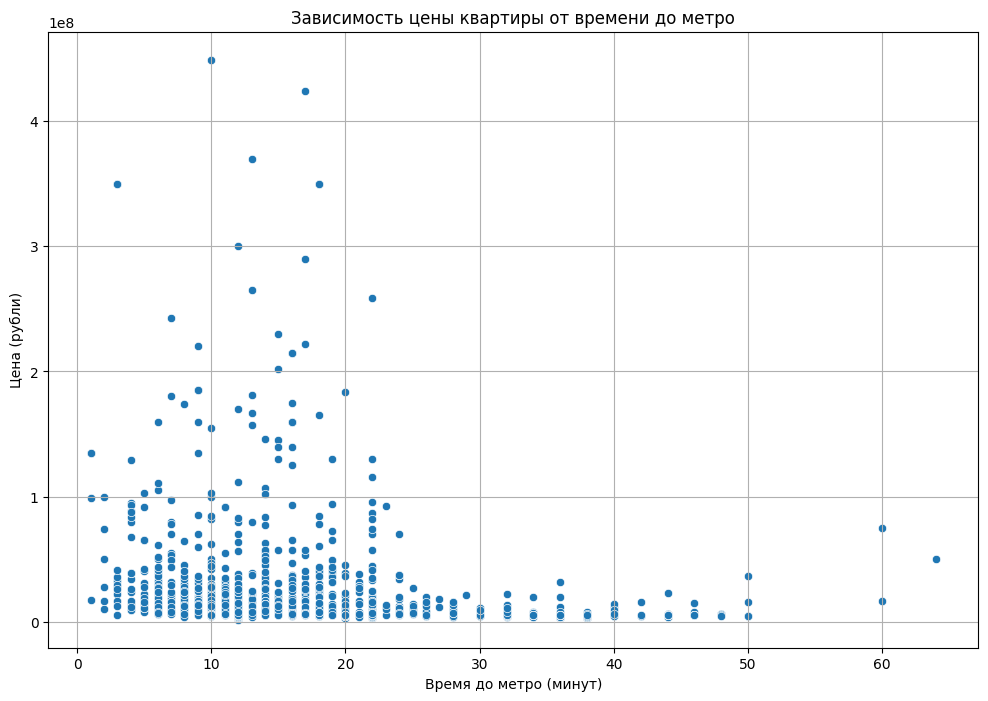

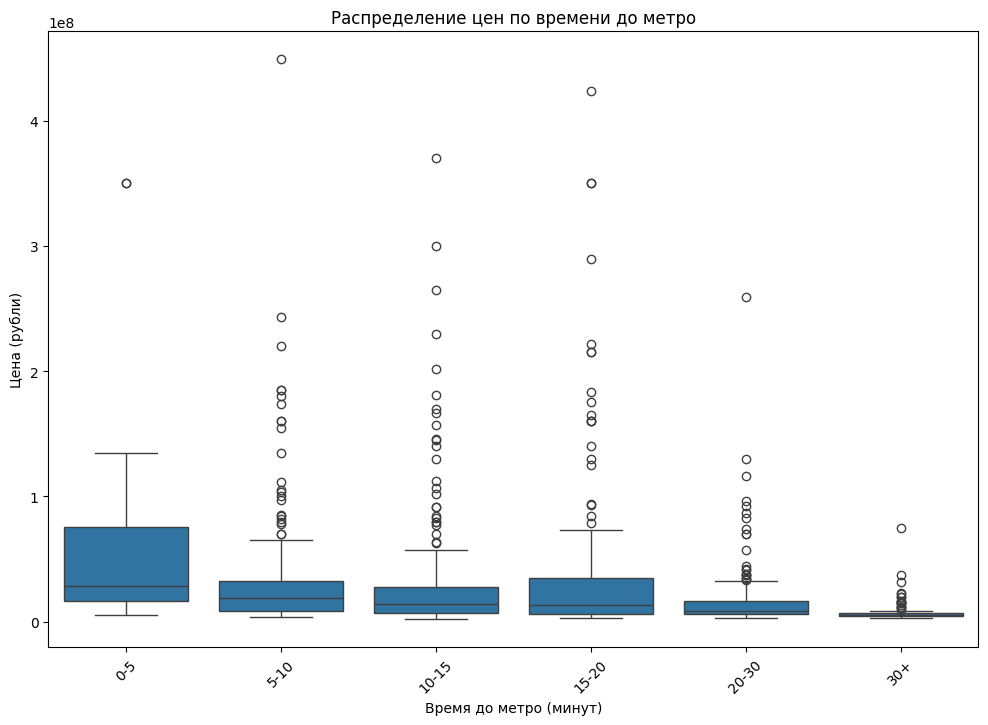

In [53]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clean, x='min_metro_time', y='Price (Rubles)')
plt.title('Зависимость цены квартиры от времени до метро')
plt.xlabel('Время до метро (минут)')
plt.ylabel('Цена (рубли)')
plt.grid(True)
plt.show()

df_clean['time_category'] = pd.cut(df_clean['min_metro_time'], 
                             bins=[0, 5, 10, 15, 20, 30, 60],
                             labels=['0-5', '5-10', '10-15', '15-20', '20-30', '30+'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_clean, x='time_category', y='Price (Rubles)')
plt.title('Распределение цен по времени до метро')
plt.xlabel('Время до метро (минут)')
plt.ylabel('Цена (рубли)')
plt.xticks(rotation=45)
plt.show()

In [65]:
df_clean.head()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 1079
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   Underground Times                                   975 non-null    object  
 1   Flat Status (1 - handed over, 0 - not handed over)  975 non-null    int64   
 2   Flat Type                                           975 non-null    object  
 3   Total Area (m^2)                                    975 non-null    float64 
 4   Living Area (m^2)                                   975 non-null    float64 
 5   Kitchen Area (m^2)                                  975 non-null    float64 
 6   Floor                                               975 non-null    int64   
 7   Year of building                                    975 non-null    int64   
 8   Price (Rubles)                                      975 non-null    i

/tmp/ipykernel_5502/1739836710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_clean.corr()


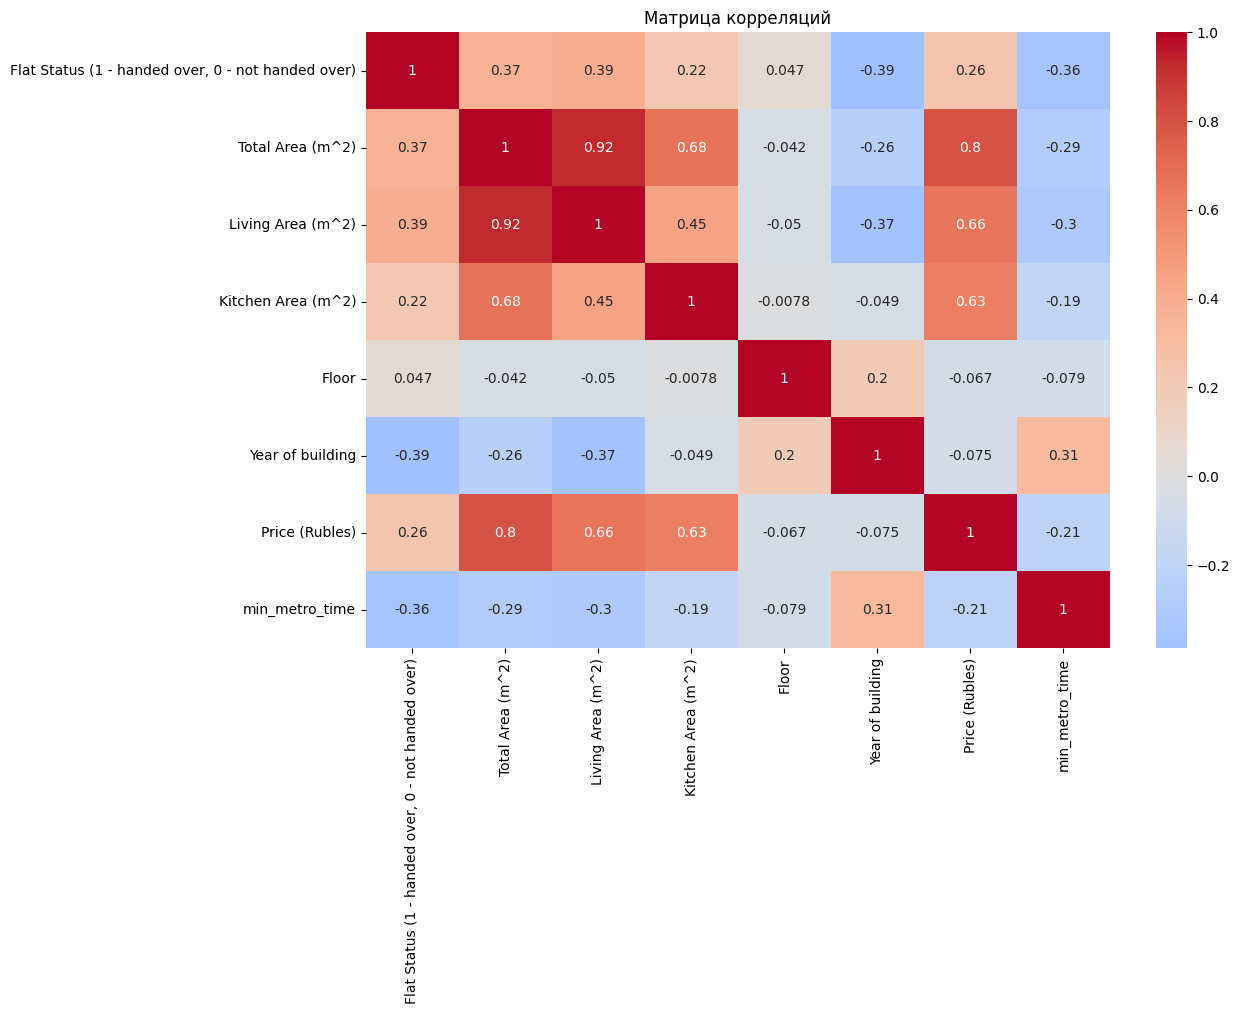

Корреляция признаков с ценой:
Price (Rubles)                                        1.000000
Total Area (m^2)                                      0.798993
Living Area (m^2)                                     0.664301
Kitchen Area (m^2)                                    0.626020
Flat Status (1 - handed over, 0 - not handed over)    0.256123
Floor                                                -0.067447
Year of building                                     -0.075101
min_metro_time                                       -0.214310
Name: Price (Rubles), dtype: float64


In [64]:
correlation_matrix = df_clean.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

price_correlations = correlation_matrix['Price (Rubles)'].sort_values(ascending=False)
print("Корреляция признаков с ценой:")
print(price_correlations)

In [59]:
#обучение моделей

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [69]:
features = ['Total Area (m^2)', 'Living Area (m^2)', 'Kitchen Area (m^2)','min_metro_time','Year of building']

X = df_clean[features]
y = df_clean['Price (Rubles)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (780, 5)
Размер тестовой выборки: (195, 5)


In [72]:
# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Список моделей для сравнения
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'SVM': SVR(kernel='rbf', C=1.0, gamma='scale')
}



# Обучение и оценка моделей
results = {}

for name, model in models.items():
    # Обучение модели
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Расчет метрик
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Кросс-валидация
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'SVM']:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'CV R2 Mean': cv_scores.mean(),
        'CV R2 Std': cv_scores.std()
    }

# Создаем DataFrame для сравнения результатов
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('R2', ascending=False)

print("Сравнение производительности моделей:")
print(results_df)


Сравнение производительности моделей:
                            MSE          RMSE           MAE        R2  \
Ridge Regression   6.033279e+14  2.456273e+07  1.263242e+07  0.674067   
Lasso Regression   6.046485e+14  2.458960e+07  1.263678e+07  0.673354   
Linear Regression  6.046485e+14  2.458960e+07  1.263678e+07  0.673354   
Random Forest      7.270538e+14  2.696394e+07  1.163617e+07  0.607227   
XGBoost            9.814294e+14  3.132777e+07  1.272638e+07  0.469807   
Gradient Boosting  1.011039e+15  3.179685e+07  1.317794e+07  0.453811   
SVM                2.196271e+15  4.686439e+07  2.266981e+07 -0.186481   

                   CV R2 Mean  CV R2 Std  
Ridge Regression     0.680545   0.051525  
Lasso Regression     0.680142   0.052185  
Linear Regression    0.680142   0.052185  
Random Forest        0.718121   0.081017  
XGBoost              0.642254   0.130062  
Gradient Boosting    0.599070   0.142460  
SVM                 -0.121080   0.021227  


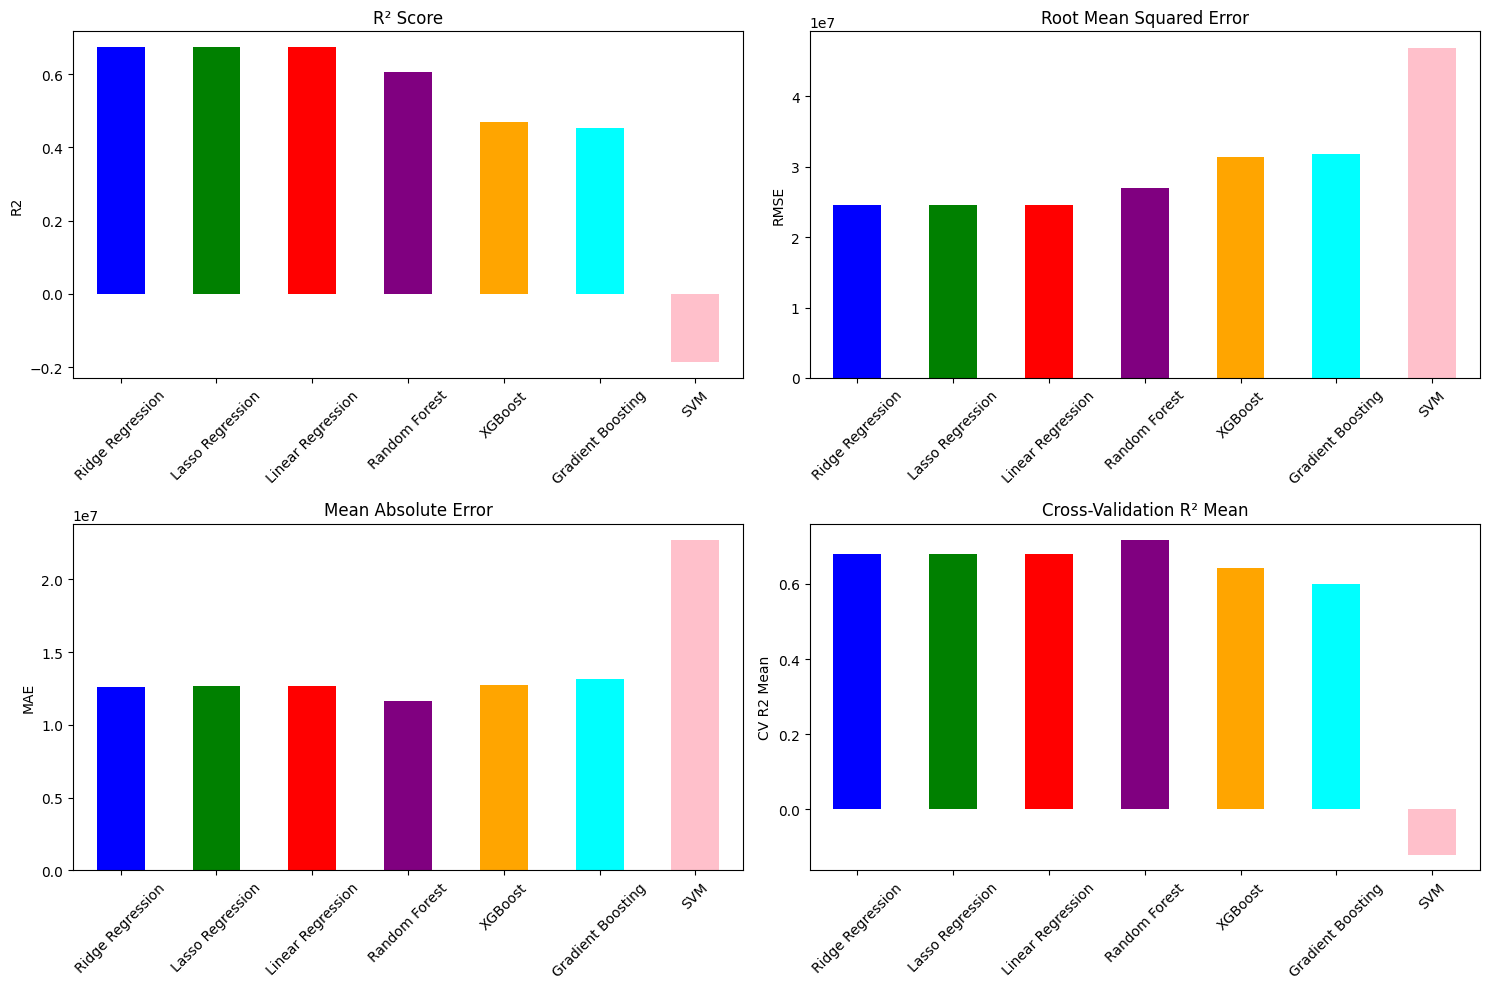

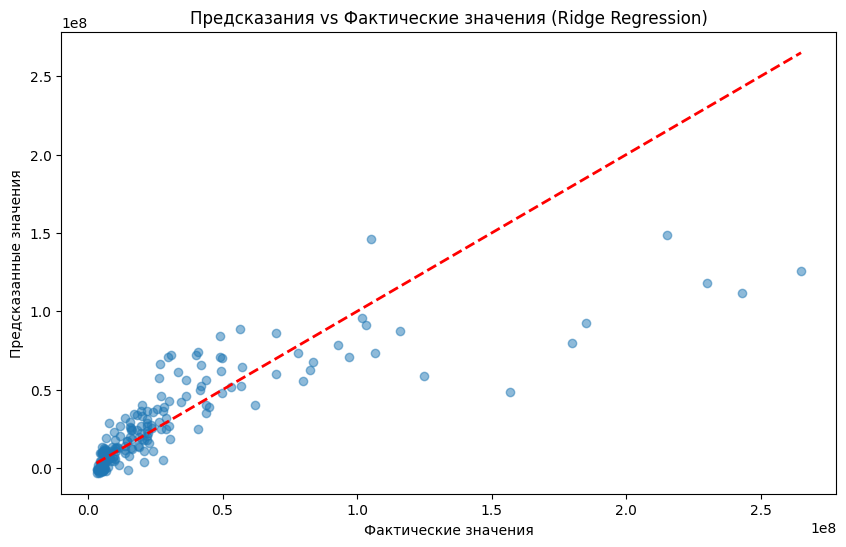

Коэффициенты модели:
              feature   coefficient
0    Total Area (m^2)  6.122838e+07
1   Living Area (m^2) -2.110509e+07
4    Year of building  4.057744e+06
2  Kitchen Area (m^2) -1.067538e+06
3      min_metro_time -8.382620e+05


In [73]:
# Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['R2', 'RMSE', 'MAE', 'CV R2 Mean']
titles = ['R² Score', 'Root Mean Squared Error', 'Mean Absolute Error', 'Cross-Validation R² Mean']

for i, (metric, title) in enumerate(zip(metrics, titles)):
    row, col = i // 2, i % 2
    results_df[metric].plot(kind='bar', ax=axes[row, col], color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'pink'])
    axes[row, col].set_title(title)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].set_ylabel(metric)

plt.tight_layout()
plt.show()

# Визуализация предсказаний лучшей модели
best_model_name = results_df.index[0]
if best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'SVM']:
    best_model = models[best_model_name]
    best_model.fit(X_train_scaled, y_train)
    y_pred = best_model.predict(X_test_scaled)
else:
    best_model = models[best_model_name]
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title(f'Предсказания vs Фактические значения ({best_model_name})')
plt.show()

# Анализ важности признаков для tree-based моделей
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Важность признаков')
    plt.show()
    
    print("Важность признаков:")
    print(feature_importance)

# Вывод коэффициентов для линейных моделей
if best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
    coefficients = pd.DataFrame({
        'feature': features,
        'coefficient': best_model.coef_
    }).sort_values('coefficient', key=abs, ascending=False)
    
    print("Коэффициенты модели:")
    print(coefficients)

In [74]:
#Линейные модели показывают лучшие результаты на текущих данных
# Tree-based модели требуют настройки гиперпараметров для улучшения результатов
# SVM не подходит для этой задачи в текущей конфигурации